In [1]:
import utils
import importlib
import pandas as pd
import numpy as np
from datetime import timedelta
from scipy import stats

importlib.reload(utils)

<module 'utils' from '/Users/tony/Documents/Python/CPSC222/FinalProject/utils.py'>

## Apple Health Data Processing
Since the .xml file is to big for vscode to handle, I use the exported csv file

In [2]:
df = pd.read_csv("test.csv", index_col=0)
df.head(10)

/var/folders/mr/wygmm0bj0dsfg8_yx680046h0000gn/T/ipykernel_92972/2736282177.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("test.csv", index_col=0)


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
0,HKQuantityTypeIdentifierHeight,Health,10.1.1,cm,2016-11-05 22:10:57 -0800,2016-11-05 22:10:57 -0800,2016-11-05 22:10:57 -0800,172.72,NaN,NaN,NaN
1,HKQuantityTypeIdentifierHeight,Health,13.2.3,cm,2019-12-04 00:55:19 -0800,2019-12-04 00:55:19 -0800,2019-12-04 00:55:19 -0800,178.0,NaN,NaN,NaN
2,HKQuantityTypeIdentifierHeight,Tony,14.6,cm,2021-07-13 22:21:49 -0800,2021-07-13 22:21:49 -0800,2021-07-13 22:21:49 -0800,177.8,NaN,NaN,NaN
3,HKQuantityTypeIdentifierHeight,Health,16.0,cm,2022-09-12 19:03:36 -0800,2022-09-12 19:03:36 -0800,2022-09-12 19:03:36 -0800,175.26,NaN,NaN,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,10.1.1,kg,2016-11-05 22:10:57 -0800,2016-11-05 22:10:57 -0800,2016-11-05 22:10:57 -0800,69.8532,NaN,NaN,NaN
5,HKQuantityTypeIdentifierBodyMass,Health,13.2.3,kg,2019-12-04 00:55:19 -0800,2019-12-04 00:55:19 -0800,2019-12-04 00:55:19 -0800,75.0,NaN,NaN,NaN
6,HKQuantityTypeIdentifierBodyMass,Tony,14.6,kg,2021-07-13 22:21:49 -0800,2021-07-13 22:21:49 -0800,2021-07-13 22:21:49 -0800,83.9146,NaN,NaN,NaN
7,HKQuantityTypeIdentifierBodyMass,Tony,15.0,kg,2021-09-21 19:17:37 -0800,2021-09-21 19:17:37 -0800,2021-09-21 19:17:37 -0800,90.0,NaN,NaN,NaN
8,HKQuantityTypeIdentifierBodyMass,Health,16.0,kg,2022-09-12 19:03:36 -0800,2022-09-12 19:03:36 -0800,2022-09-12 19:03:36 -0800,81.6466,NaN,NaN,NaN
9,HKQuantityTypeIdentifierHeartRate,Tony’s Apple Watch,7.5,count/min,2021-07-14 22:34:30 -0800,2021-07-14 22:34:29 -0800,2021-07-14 22:34:29 -0800,113.0,"<<HKDevice: 0x2815bacb0>, name:Apple Watch, ma...",NaN,NaN


In [3]:
df = df[df.type == "HKCategoryTypeIdentifierSleepAnalysis"]

df.drop("sourceName", axis=1, inplace=True)
df.drop("sourceVersion", axis=1, inplace=True)
df.drop("unit", axis=1, inplace=True)
df.drop("value", axis=1, inplace=True)
df.drop("device", axis=1, inplace=True)
df.drop("MetadataEntry", axis=1, inplace=True)
df.drop("HeartRateVariabilityMetadataList", axis=1, inplace=True)

df.reset_index(inplace=True)
df.head(10)

,index,type,creationDate,startDate,endDate
0,936101,HKCategoryTypeIdentifierSleepAnalysis,2016-07-07 15:32:30 -0800,2016-07-07 08:39:56 -0800,2016-07-07 15:32:29 -0800
1,936102,HKCategoryTypeIdentifierSleepAnalysis,2016-07-08 15:55:36 -0800,2016-07-08 08:30:32 -0800,2016-07-08 08:53:40 -0800
2,936103,HKCategoryTypeIdentifierSleepAnalysis,2016-07-08 15:55:36 -0800,2016-07-08 08:54:00 -0800,2016-07-08 15:55:35 -0800
3,936104,HKCategoryTypeIdentifierSleepAnalysis,2016-07-09 17:33:56 -0800,2016-07-09 08:49:44 -0800,2016-07-09 17:33:55 -0800
4,936105,HKCategoryTypeIdentifierSleepAnalysis,2016-07-10 17:05:15 -0800,2016-07-10 08:29:32 -0800,2016-07-10 17:05:15 -0800
5,936106,HKCategoryTypeIdentifierSleepAnalysis,2016-07-11 15:35:29 -0800,2016-07-11 08:23:08 -0800,2016-07-11 15:35:29 -0800
6,936107,HKCategoryTypeIdentifierSleepAnalysis,2016-07-12 15:52:00 -0800,2016-07-12 08:00:40 -0800,2016-07-12 15:51:59 -0800
7,936108,HKCategoryTypeIdentifierSleepAnalysis,2016-11-06 14:43:18 -0800,2016-11-06 10:03:00 -0800,2016-11-06 10:38:56 -0800
8,936109,HKCategoryTypeIdentifierSleepAnalysis,2016-11-06 14:43:18 -0800,2016-11-06 10:41:24 -0800,2016-11-06 10:59:40 -0800
9,936110,HKCategoryTypeIdentifierSleepAnalysis,2016-11-06 14:43:18 -0800,2016-11-06 11:27:08 -0800,2016-11-06 14:43:13 -0800


In [4]:
df["startDate"] = pd.to_datetime(df["startDate"])
df["endDate"] = pd.to_datetime(df["endDate"])
df["creationDate"] = pd.to_datetime(df["creationDate"])
sleepTime = []
for item in range(len(df)):
    sleepTime.append(df.iloc[item, 4] - df.iloc[item, 3])
sleepTime = pd.Series(sleepTime)
df.head(10)

,index,type,creationDate,startDate,endDate
0,936101,HKCategoryTypeIdentifierSleepAnalysis,2016-07-07 15:32:30-08:00,2016-07-07 08:39:56-08:00,2016-07-07 15:32:29-08:00
1,936102,HKCategoryTypeIdentifierSleepAnalysis,2016-07-08 15:55:36-08:00,2016-07-08 08:30:32-08:00,2016-07-08 08:53:40-08:00
2,936103,HKCategoryTypeIdentifierSleepAnalysis,2016-07-08 15:55:36-08:00,2016-07-08 08:54:00-08:00,2016-07-08 15:55:35-08:00
3,936104,HKCategoryTypeIdentifierSleepAnalysis,2016-07-09 17:33:56-08:00,2016-07-09 08:49:44-08:00,2016-07-09 17:33:55-08:00
4,936105,HKCategoryTypeIdentifierSleepAnalysis,2016-07-10 17:05:15-08:00,2016-07-10 08:29:32-08:00,2016-07-10 17:05:15-08:00
5,936106,HKCategoryTypeIdentifierSleepAnalysis,2016-07-11 15:35:29-08:00,2016-07-11 08:23:08-08:00,2016-07-11 15:35:29-08:00
6,936107,HKCategoryTypeIdentifierSleepAnalysis,2016-07-12 15:52:00-08:00,2016-07-12 08:00:40-08:00,2016-07-12 15:51:59-08:00
7,936108,HKCategoryTypeIdentifierSleepAnalysis,2016-11-06 14:43:18-08:00,2016-11-06 10:03:00-08:00,2016-11-06 10:38:56-08:00
8,936109,HKCategoryTypeIdentifierSleepAnalysis,2016-11-06 14:43:18-08:00,2016-11-06 10:41:24-08:00,2016-11-06 10:59:40-08:00
9,936110,HKCategoryTypeIdentifierSleepAnalysis,2016-11-06 14:43:18-08:00,2016-11-06 11:27:08-08:00,2016-11-06 14:43:13-08:00


In [5]:
df.drop("index", axis=1, inplace=True)
df = pd.concat([df, sleepTime], axis=1, ignore_index=False)
df.rename({0: "sleepTime"}, axis=1, inplace=True)
df.tail(10)

,type,creationDate,startDate,endDate,sleepTime
928,HKCategoryTypeIdentifierSleepAnalysis,2022-11-19 08:00:03-08:00,2022-11-18 23:58:22-08:00,2022-11-19 07:28:58-08:00,0 days 07:30:36
929,HKCategoryTypeIdentifierSleepAnalysis,2022-11-20 09:09:31-08:00,2022-11-20 03:14:28-08:00,2022-11-20 09:09:19-08:00,0 days 05:54:51
930,HKCategoryTypeIdentifierSleepAnalysis,2022-11-21 06:56:37-08:00,2022-11-21 00:52:02-08:00,2022-11-21 06:42:47-08:00,0 days 05:50:45
931,HKCategoryTypeIdentifierSleepAnalysis,2022-11-22 06:45:22-08:00,2022-11-22 00:26:27-08:00,2022-11-22 06:45:22-08:00,0 days 06:18:55
932,HKCategoryTypeIdentifierSleepAnalysis,2022-11-23 07:09:08-08:00,2022-11-23 00:31:18-08:00,2022-11-23 06:48:28-08:00,0 days 06:17:10
933,HKCategoryTypeIdentifierSleepAnalysis,2022-11-24 06:40:01-08:00,2022-11-24 00:20:11-08:00,2022-11-24 06:40:00-08:00,0 days 06:19:49
934,HKCategoryTypeIdentifierSleepAnalysis,2022-11-25 08:39:16-08:00,2022-11-25 03:14:23-08:00,2022-11-25 08:39:16-08:00,0 days 05:24:53
935,HKCategoryTypeIdentifierSleepAnalysis,2022-11-27 07:16:44-08:00,2022-11-27 02:11:47-08:00,2022-11-27 06:40:18-08:00,0 days 04:28:31
936,HKCategoryTypeIdentifierSleepAnalysis,2022-11-28 06:40:45-08:00,2022-11-27 23:32:00-08:00,2022-11-28 06:40:45-08:00,0 days 07:08:45
937,HKCategoryTypeIdentifierSleepAnalysis,2022-11-29 06:40:15-08:00,2022-11-29 00:13:46-08:00,2022-11-29 06:40:14-08:00,0 days 06:26:28


Split to two groups, Fall 22 and Spring 22

I cannot recall exactly when was the beginning date of Spring 22 since the information was taken down on Gonzaga's website. So, I traced back to the most related email from a class that I took in Spring 22 saying its first session was on Jan 12

For Fall 22, although the semester is not over, I have included all data I have until the point I perform this demo.

Groupby creation date to calculate total sleep time per night

In [6]:
df["startDate"] = df["startDate"].dt.strftime("%Y-%m-%d")
df["endDate"] = df["endDate"].dt.strftime("%Y-%m-%d")
df["creationDate"] = df["creationDate"].dt.strftime("%Y-%m-%d")

fall_22 = df[(df.creationDate >= "2022-08-30") & (df.creationDate <= "2022-11-29")]

spring_22 = df[(df.creationDate >= "2022-01-12") & (df.creationDate <= "2022-05-05")]
fall_22

,type,creationDate,startDate,endDate,sleepTime
666,HKCategoryTypeIdentifierSleepAnalysis,2022-08-30,2022-08-29,2022-08-30,0 days 05:35:09
667,HKCategoryTypeIdentifierSleepAnalysis,2022-08-30,2022-08-30,2022-08-30,0 days 00:04:46
668,HKCategoryTypeIdentifierSleepAnalysis,2022-08-31,2022-08-30,2022-08-31,0 days 07:51:48
669,HKCategoryTypeIdentifierSleepAnalysis,2022-09-01,2022-08-31,2022-09-01,0 days 08:31:22
670,HKCategoryTypeIdentifierSleepAnalysis,2022-09-02,2022-09-01,2022-09-02,0 days 06:34:54
...,...,...,...,...,...
933,HKCategoryTypeIdentifierSleepAnalysis,2022-11-24,2022-11-24,2022-11-24,0 days 06:19:49
934,HKCategoryTypeIdentifierSleepAnalysis,2022-11-25,2022-11-25,2022-11-25,0 days 05:24:53
935,HKCategoryTypeIdentifierSleepAnalysis,2022-11-27,2022-11-27,2022-11-27,0 days 04:28:31
936,HKCategoryTypeIdentifierSleepAnalysis,2022-11-28,2022-11-27,2022-11-28,0 days 07:08:45


In [7]:
fall_22 = fall_22.groupby("creationDate").sum()
fall_22

,type,startDate,endDate,sleepTime
creationDate,,,,
2022-08-30,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-08-292022-08-30,2022-08-302022-08-30,0 days 05:39:55
2022-08-31,HKCategoryTypeIdentifierSleepAnalysis,2022-08-30,2022-08-31,0 days 07:51:48
2022-09-01,HKCategoryTypeIdentifierSleepAnalysis,2022-08-31,2022-09-01,0 days 08:31:22
2022-09-02,HKCategoryTypeIdentifierSleepAnalysis,2022-09-01,2022-09-02,0 days 06:34:54
2022-09-03,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-09-032022-09-032022-09-03,2022-09-032022-09-032022-09-03,0 days 06:51:32
...,...,...,...,...
2022-11-24,HKCategoryTypeIdentifierSleepAnalysis,2022-11-24,2022-11-24,0 days 06:19:49
2022-11-25,HKCategoryTypeIdentifierSleepAnalysis,2022-11-25,2022-11-25,0 days 05:24:53
2022-11-27,HKCategoryTypeIdentifierSleepAnalysis,2022-11-27,2022-11-27,0 days 04:28:31


In [8]:
spring_22 = spring_22.groupby("creationDate").sum()
spring_22

,type,startDate,endDate,sleepTime
creationDate,,,,
2022-01-12,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-01-122022-01-122022-01-12,2022-01-122022-01-122022-01-12,0 days 05:53:27
2022-01-13,HKCategoryTypeIdentifierSleepAnalysis,2022-01-13,2022-01-13,0 days 06:55:50
2022-01-14,HKCategoryTypeIdentifierSleepAnalysis,2022-01-14,2022-01-14,0 days 04:31:58
2022-01-17,HKCategoryTypeIdentifierSleepAnalysis,2022-01-17,2022-01-17,0 days 06:47:59
2022-01-18,HKCategoryTypeIdentifierSleepAnalysis,2022-01-18,2022-01-18,0 days 05:12:19
...,...,...,...,...
2022-04-29,HKCategoryTypeIdentifierSleepAnalysis,2022-04-29,2022-04-29,0 days 05:22:25
2022-05-02,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-05-022022-05-02,2022-05-022022-05-02,0 days 07:04:13
2022-05-03,HKCategoryTypeIdentifierSleepAnalysis,2022-05-02,2022-05-03,0 days 06:55:21


In [9]:
date_fa22 = pd.read_csv("fall_22_dow.csv", index_col=0)
date_sp22 = pd.read_csv("spring_22_dow.csv", index_col=0)

In [10]:
fall_22 = fall_22.merge(date_fa22, on=fall_22.index)
fall_22.set_index("key_0", inplace=True)
fall_22.index = pd.to_datetime(fall_22.index)
fall_22

,type,startDate,endDate,sleepTime,date_of_week
key_0,,,,,
2022-08-30,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-08-292022-08-30,2022-08-302022-08-30,0 days 05:39:55,Tuesday
2022-08-31,HKCategoryTypeIdentifierSleepAnalysis,2022-08-30,2022-08-31,0 days 07:51:48,Wednesday
2022-09-01,HKCategoryTypeIdentifierSleepAnalysis,2022-08-31,2022-09-01,0 days 08:31:22,Thursday
2022-09-02,HKCategoryTypeIdentifierSleepAnalysis,2022-09-01,2022-09-02,0 days 06:34:54,Friday
2022-09-03,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-09-032022-09-032022-09-03,2022-09-032022-09-032022-09-03,0 days 06:51:32,Saturday
...,...,...,...,...,...
2022-11-24,HKCategoryTypeIdentifierSleepAnalysis,2022-11-24,2022-11-24,0 days 06:19:49,Thursday
2022-11-25,HKCategoryTypeIdentifierSleepAnalysis,2022-11-25,2022-11-25,0 days 05:24:53,Friday
2022-11-27,HKCategoryTypeIdentifierSleepAnalysis,2022-11-27,2022-11-27,0 days 04:28:31,Sunday


In [11]:
spring_22 = spring_22.merge(date_sp22, on=spring_22.index)
spring_22.set_index("key_0", inplace=True)
spring_22.index = pd.to_datetime(spring_22.index)
spring_22

,type,startDate,endDate,sleepTime,day_of_week
key_0,,,,,
2022-01-12,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-01-122022-01-122022-01-12,2022-01-122022-01-122022-01-12,0 days 05:53:27,Wednesday
2022-01-13,HKCategoryTypeIdentifierSleepAnalysis,2022-01-13,2022-01-13,0 days 06:55:50,Thursday
2022-01-14,HKCategoryTypeIdentifierSleepAnalysis,2022-01-14,2022-01-14,0 days 04:31:58,Friday
2022-01-17,HKCategoryTypeIdentifierSleepAnalysis,2022-01-17,2022-01-17,0 days 06:47:59,Monday
2022-01-18,HKCategoryTypeIdentifierSleepAnalysis,2022-01-18,2022-01-18,0 days 05:12:19,Tuesday
...,...,...,...,...,...
2022-04-29,HKCategoryTypeIdentifierSleepAnalysis,2022-04-29,2022-04-29,0 days 05:22:25,Friday
2022-05-02,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-05-022022-05-02,2022-05-022022-05-02,0 days 07:04:13,Monday
2022-05-03,HKCategoryTypeIdentifierSleepAnalysis,2022-05-02,2022-05-03,0 days 06:55:21,Tuesday


## Netflix Data

In [12]:
nf = pd.read_csv("NetflixViewingHistory.csv")
nf["Date"] = pd.to_datetime(nf["Date"])
nf.sort_values(by="Date", inplace=True, ignore_index=True)
nf

,Title,Date
0,"Street Food: Asia: Ho Chi Minh City, Vietnam",2020-01-25
1,The Kissing Booth,2020-01-28
2,13 Reasons Why: Season 3: Let the Dead Bury th...,2020-02-03
3,Irreplaceable You,2020-02-05
4,The Perfect Date,2020-02-06
...,...,...
2573,First Love: Talk in Sign Language,2022-11-29
2574,First Love: The Sixth Sense,2022-11-29
2575,First Love: The Order of Dreams,2022-11-29
2576,First Love: The Proust Effect on a Certain Aft...,2022-11-29


In [13]:
nf_fa22 = nf[(nf.Date >= "2022-08-30") & (nf.Date <= "2022-11-29")]
grouped_nf_fa22 = nf_fa22.groupby("Date").count()
grouped_nf_fa22.columns = grouped_nf_fa22.columns.str.replace("Title", "num_of_movies_watched")
grouped_nf_fa22

,num_of_movies_watched
Date,
2022-08-30,5
2022-09-01,2
2022-09-02,3
2022-09-04,8
2022-09-05,6
2022-09-06,5
2022-09-07,2
2022-09-08,2
2022-09-09,5


In [14]:
nf_sp22 = nf[(nf.Date >= "2022-01-12") & (nf.Date <= "2022-05-05")]
grouped_nf_sp22 = nf_sp22.groupby("Date").count()
grouped_nf_sp22.columns = grouped_nf_sp22.columns.str.replace("Title", "num_of_movies_watched")
grouped_nf_sp22

,num_of_movies_watched
Date,
2022-01-12,1
2022-01-13,5
2022-01-14,3
2022-01-16,6
2022-01-18,1
2022-01-19,4
2022-01-21,1
2022-01-22,2
2022-01-25,1


## Apple Heath and Netflix Data Merging

In [15]:
fall_22 = fall_22.merge(grouped_nf_fa22, how="inner", right_index=True, left_index=True)
fall_22["sleepTime"] = fall_22["sleepTime"] / timedelta(hours=1)
fall_22

,type,startDate,endDate,sleepTime,date_of_week,num_of_movies_watched
2022-08-30,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-08-292022-08-30,2022-08-302022-08-30,5.665278,Tuesday,5
2022-09-01,HKCategoryTypeIdentifierSleepAnalysis,2022-08-31,2022-09-01,8.522778,Thursday,2
2022-09-02,HKCategoryTypeIdentifierSleepAnalysis,2022-09-01,2022-09-02,6.581667,Friday,3
2022-09-05,HKCategoryTypeIdentifierSleepAnalysis,2022-09-05,2022-09-05,4.938056,Monday,6
2022-09-06,HKCategoryTypeIdentifierSleepAnalysis,2022-09-06,2022-09-06,5.991389,Tuesday,5
2022-09-07,HKCategoryTypeIdentifierSleepAnalysis,2022-09-06,2022-09-07,5.393333,Wednesday,2
2022-09-08,HKCategoryTypeIdentifierSleepAnalysis,2022-09-07,2022-09-08,6.906667,Thursday,2
2022-09-09,HKCategoryTypeIdentifierSleepAnalysis,2022-09-08,2022-09-09,6.466111,Friday,5
2022-09-10,HKCategoryTypeIdentifierSleepAnalysis,2022-09-10,2022-09-10,6.165556,Saturday,3
2022-09-14,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-09-142022-09-142022-09-142022-09-142022-0...,2022-09-142022-09-142022-09-142022-09-142022-0...,11.395000,Wednesday,4


In [16]:
print(fall_22.shape)

(30, 6)


In [17]:
spring_22 = spring_22.merge(grouped_nf_sp22, how="inner", right_index=True, left_index=True)
spring_22["sleepTime"] = spring_22["sleepTime"] / timedelta(hours=1)
spring_22

,type,startDate,endDate,sleepTime,day_of_week,num_of_movies_watched
2022-01-12,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-01-122022-01-122022-01-12,2022-01-122022-01-122022-01-12,5.890833,Wednesday,1
2022-01-13,HKCategoryTypeIdentifierSleepAnalysis,2022-01-13,2022-01-13,6.930556,Thursday,5
2022-01-14,HKCategoryTypeIdentifierSleepAnalysis,2022-01-14,2022-01-14,4.532778,Friday,3
2022-01-18,HKCategoryTypeIdentifierSleepAnalysis,2022-01-18,2022-01-18,5.205278,Tuesday,1
2022-01-19,HKCategoryTypeIdentifierSleepAnalysis,2022-01-19,2022-01-19,4.634167,Wednesday,4
2022-01-21,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-01-202022-01-202022-01-212022-01-21,2022-01-202022-01-202022-01-212022-01-21,4.954722,Friday,1
2022-01-25,HKCategoryTypeIdentifierSleepAnalysis,2022-01-25,2022-01-25,6.607500,Tuesday,1
2022-01-27,HKCategoryTypeIdentifierSleepAnalysis,2022-01-27,2022-01-27,5.188333,Thursday,1
2022-02-01,HKCategoryTypeIdentifierSleepAnalysis,2022-02-01,2022-02-01,5.464444,Tuesday,7
2022-02-02,HKCategoryTypeIdentifierSleepAnalysisHKCategor...,2022-02-022022-02-022022-02-02,2022-02-022022-02-022022-02-02,5.773611,Wednesday,7


In [18]:
print(spring_22.shape)

(38, 6)


## Statistic Calculation

In [19]:
n_fa22 = len(fall_22)
nf_fa22_std = np.std(fall_22["num_of_movies_watched"], ddof=1)
nf_fa22_mean = np.mean(fall_22["num_of_movies_watched"])
fa22_std = np.std(fall_22["sleepTime"], ddof=1)
fa22_mean = np.mean(fall_22["sleepTime"])

print("Fall 2022 number of instance is", n_fa22)
print("Fall 2022 number of movie watched sample mean is", nf_fa22_mean)
print("Fall 2022 number of movie watched standard deviation is", nf_fa22_std)
print("Fall 2022 sleep time sample mean is", fa22_mean)
print("Fall 2022 sleep time standard deviation is", fa22_std)

Fall 2022 number of instance is 30
Fall 2022 number of movie watched sample mean is 3.4
Fall 2022 number of movie watched standard deviation is 2.5270945563139744
Fall 2022 sleep time sample mean is 6.723157407407408
Fall 2022 sleep time standard deviation is 1.7594002750416977


In [20]:
n_sp22 = len(spring_22)
nf_sp22_std = np.std(spring_22["num_of_movies_watched"], ddof=1)
nf_sp22_mean = np.mean(spring_22["num_of_movies_watched"])
sp22_std = np.std(spring_22["sleepTime"], ddof=1)
sp22_mean = np.mean(spring_22["sleepTime"])

print("Spring 2022 number of instance is", n_sp22)
print("Spring 2022 number of movie watched sample mean is", nf_sp22_mean)
print("Spring 2022 number of movie watched standard deviation is", nf_sp22_std)
print("Spring 2022 sleep time sample mean is", sp22_mean)
print("Spring 2022 sleep time standard deviation is", sp22_std)

Spring 2022 number of instance is 38
Spring 2022 number of movie watched sample mean is 2.8947368421052633
Spring 2022 number of movie watched standard deviation is 2.140844411380965
Spring 2022 sleep time sample mean is 5.627280701754386
Spring 2022 sleep time standard deviation is 1.5336175234934755


## Data Visualization

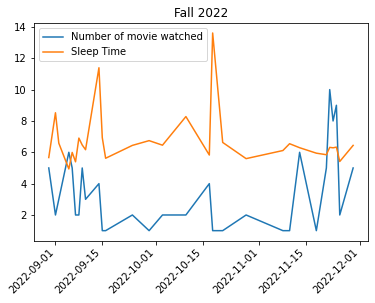

In [21]:
utils.data_visualization(fall_22, "Fall 2022")

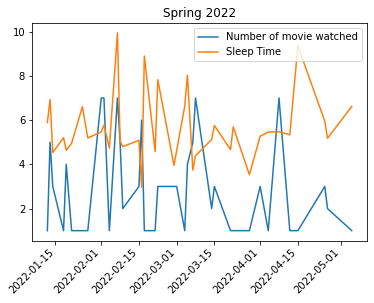

In [22]:
utils.data_visualization(spring_22, "Spring 2022")

## Hyppthesis Testing
I want to know if the mean sleeping time in Fall 22 is less than Spring 22, considering I have watched more Netflix show/tv

We are dealing with two-sampled, left-tailed independent test

I choose level of significance of 0.025

1. State the null and alternative hypothesis
* $H_0$: $\mu_{FA} \geq \mu_{SP}$
* $H_1$: $\mu_{FA} < \mu_{SP}$

2. Select the significance level
* $\alpha$ = 0.0005

3. Select the appropriate test statistic
$$t = \frac {\overline {X_{FA}} - \overline {X_{SP}}}{\sqrt {s_p^2 (\frac {1}{n_{FA}} + \frac {1}{n_{SP}})}}$$

$$\text {where } s_p^2 = \frac{(n_{FA} - 1)s_{FA}^2 + (n_{SP} - 1)s_{SP}^2}{n_{FA} + n_{SP} - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{FA} + n_{SP} - 2 = 30 + 38 - 2 = 66$
* Critical value: $t_{critical} = -3.4446$
* Since $H_1$: $\mu_{Fa} < \mu_{SP}$, we are dealing with left-tailed test. The decision rule is as follow:
    * If $t_{computed} < -3.4446$, then *Reject $H_0$*
    * If $t_{computed} \geq -3.4446$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$

In [24]:
t_computed, pval = stats.ttest_ind(spring_22["sleepTime"], fall_22["sleepTime"])
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.0005
t_critical = -3.4446
if (pval / 2) < alpha and t_computed < t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed >= t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: -2.7415719733637363
p_value is: 0.00393032754036658
Do not reject H0
